In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#!pip install threadpoolctl

In [3]:
df = pd.read_csv('DataSet_Tesco5000_withDaynum.csv')

In [4]:
df.shape

(596733, 4)

In [5]:
df['customer_id'].nunique() ## aggregáció kell

5000

In [6]:
customer_df = df.groupby('customer_id')['visit_spend'].agg(['count','mean'])

In [7]:
customer_df.head()

,count,mean
customer_id,,
2,125,20.961280
3,167,27.606707
4,100,106.954800
5,133,31.074436
6,64,55.112344


Text(0, 0.5, 'vasarlás')

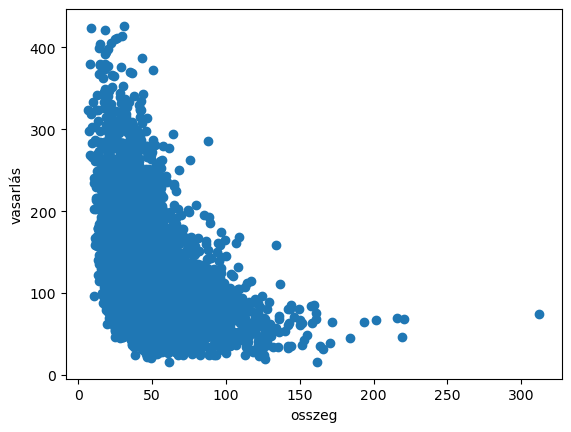

In [8]:
plt.scatter(customer_df['mean'],customer_df['count'])
plt.xlabel('osszeg')
plt.ylabel('vasarlás')

In [9]:
X_cols = ['count','mean']

X = customer_df.loc[:,X_cols]

In [10]:
kmeans = KMeans(n_clusters = 2, random_state = 42)

kmeans.fit(X)

D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [11]:
customer_df['cluster'] = kmeans.predict(X)

Text(0, 0.5, 'vasarlás')

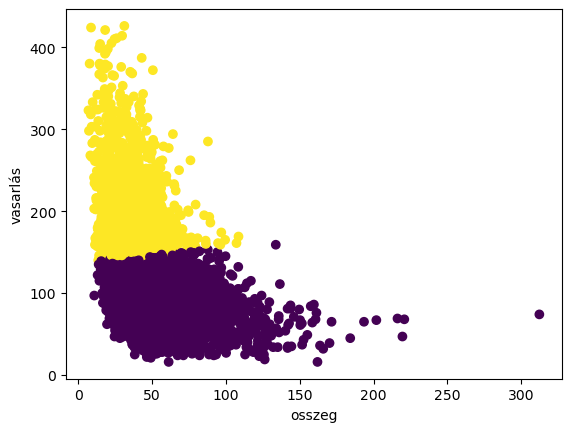

In [12]:
plt.scatter(customer_df['mean'],customer_df['count'], c=customer_df['cluster'])
plt.xlabel('osszeg')
plt.ylabel('vasarlás')

In [13]:
scaler = StandardScaler()


In [14]:
scaler.fit(X)

StandardScaler()

In [15]:
X_scaled = scaler.transform(X)

In [16]:
X_scaled

array([[ 0.08834384, -1.22022304],
       [ 0.74466415, -0.94936008],
       [-0.30232301,  2.28481299],
       ...,
       [ 0.7134108 , -0.91287842],
       [ 0.82279752, -0.92839831],
       [-0.8492566 ,  0.56106941]])

D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


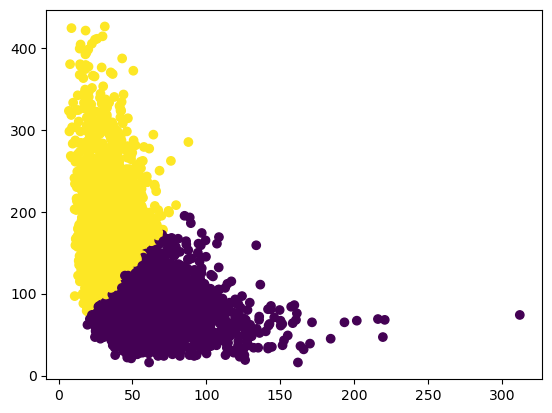

In [17]:
kmeans = KMeans(n_clusters=2,random_state = 42)
kmeans.fit(X_scaled)
customer_df['clusters_scaled'] = kmeans.predict(X_scaled)
plt.scatter(customer_df['mean'],customer_df['count'], c=customer_df['clusters_scaled'])

In [18]:
sse_list = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state = 42)
    
    kmeans.fit(X_scaled)
    sse = kmeans.inertia_
    
    sse_list.append(sse)

D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

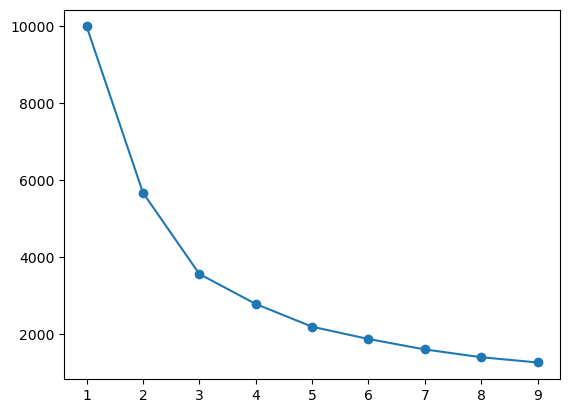

In [20]:

plt.plot(range(1,10),sse_list, marker='o')

In [43]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(X_scaled)
customer_df['cluster_3'] = kmeans.predict(X_scaled)

D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


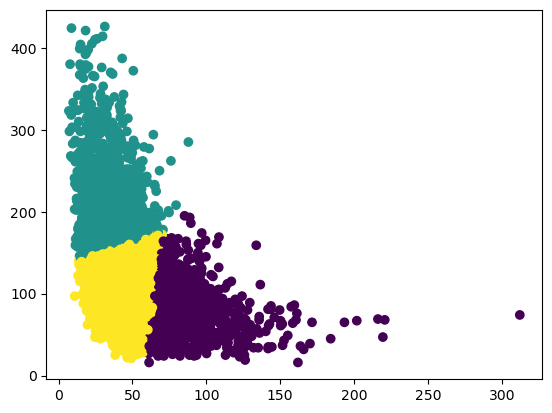

In [44]:
plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['cluster_3'])

In [45]:
centroid_scaled = kmeans.cluster_centers_

In [46]:
scaler.inverse_transform(centroid_scaled)

array([[ 76.18083333,  84.6624385 ],
       [213.65293602,  33.00102403],
       [ 98.35953366,  43.34101057]])

In [47]:
centroids = scaler.inverse_transform(centroid_scaled)

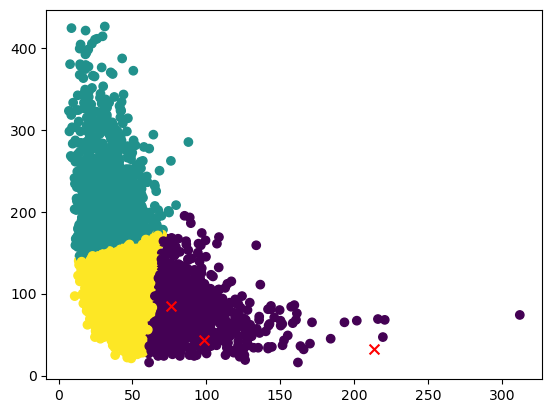

In [48]:
plt.scatter(customer_df['mean'], customer_df['count'], c=customer_df['cluster_3'])
plt.scatter(centroids[:, 0], centroids[:, 1], color='r', s=50, marker = 'x')

In [49]:
df['visit_date'] = pd.to_datetime(df['visit_date'])

In [50]:
df['dayofweek'] = df['visit_date'].dt.dayofweek +1

In [51]:
df.head()

,customer_id,visit_date,visit_spend,daynum,dayofweek
0,2,2010-04-01,5.97,0,4
1,2,2010-04-06,12.71,5,2
2,2,2010-04-07,34.52,6,3
3,2,2010-04-12,7.89,11,1
4,2,2010-04-14,17.17,13,3


In [52]:
customer_df = df.groupby(['customer_id', 'dayofweek'])['visit_spend'].sum().unstack()

In [53]:
customer_df = customer_df.fillna(0)

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [55]:
X_cols = range(1, 8)

In [56]:
X = customer_df.loc[:, X_cols]

In [57]:
kmeans.fit(X)

D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [58]:
customer_df['cluster'] = kmeans.predict(X)

<Axes: xlabel='dayofweek'>

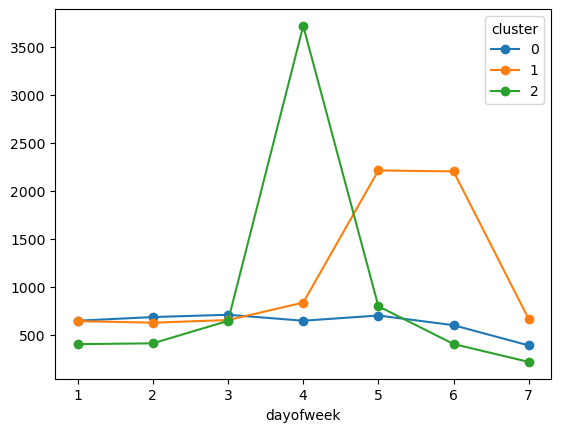

In [59]:
customer_df.groupby('cluster')[X.columns].mean().T.plot(marker='o')

In [60]:
customer_df['cluster'].value_counts()

cluster
0    3432
1    1154
2     414
Name: count, dtype: int64

In [61]:
X.head()

dayofweek,1,2,3,4,5,6,7
customer_id,,,,,,,
2,209.66,316.59,271.62,150.70,1130.00,400.77,140.82
3,259.35,268.16,231.53,752.57,295.20,2319.12,484.39
4,1363.53,1242.90,2130.12,1566.87,1609.84,1920.61,861.61
5,417.31,781.38,468.27,658.71,754.29,894.19,158.75
6,2625.55,356.37,89.42,56.62,312.15,87.08,0.00


In [62]:
customer_df['sum'] = customer_df.loc[:,range(1,8)].sum(axis = 1)

In [63]:
customer_df.head()

dayofweek,1,2,3,4,5,6,7,cluster,sum
customer_id,,,,,,,,,
2,209.66,316.59,271.62,150.70,1130.00,400.77,140.82,0,2620.16
3,259.35,268.16,231.53,752.57,295.20,2319.12,484.39,0,4610.32
4,1363.53,1242.90,2130.12,1566.87,1609.84,1920.61,861.61,1,10695.48
5,417.31,781.38,468.27,658.71,754.29,894.19,158.75,0,4132.90
6,2625.55,356.37,89.42,56.62,312.15,87.08,0.00,0,3527.19


In [64]:
for i in range(1,8):
    customer_df[str(i)+'_ratio'] = customer_df[i] / customer_df['sum']

In [65]:
customer_df

dayofweek,1,2,3,4,5,6,7,cluster,sum,1_ratio,2_ratio,3_ratio,4_ratio,5_ratio,6_ratio,7_ratio
customer_id,,,,,,,,,,,,,,,,
2,209.66,316.59,271.62,150.70,1130.00,400.77,140.82,0,2620.16,0.080018,0.120828,0.103665,0.057516,0.431271,0.152956,0.053745
3,259.35,268.16,231.53,752.57,295.20,2319.12,484.39,0,4610.32,0.056254,0.058165,0.050220,0.163236,0.064030,0.503028,0.105066
4,1363.53,1242.90,2130.12,1566.87,1609.84,1920.61,861.61,1,10695.48,0.127487,0.116208,0.199161,0.146498,0.150516,0.179572,0.080558
5,417.31,781.38,468.27,658.71,754.29,894.19,158.75,0,4132.90,0.100973,0.189063,0.113303,0.159382,0.182509,0.216359,0.038411
6,2625.55,356.37,89.42,56.62,312.15,87.08,0.00,0,3527.19,0.744374,0.101035,0.025352,0.016052,0.088498,0.024688,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,490.09,317.26,501.04,616.98,473.38,807.11,192.59,0,3398.45,0.144210,0.093354,0.147432,0.181547,0.139293,0.237494,0.056670
7372,1027.62,596.17,1196.02,1283.71,740.82,3043.69,2859.11,1,10747.14,0.095618,0.055472,0.111287,0.119447,0.068932,0.283209,0.266034
7373,2321.43,438.06,259.70,240.14,999.44,388.21,55.81,0,4702.79,0.493628,0.093149,0.055223,0.051063,0.212521,0.082549,0.011867


D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='dayofweek'>

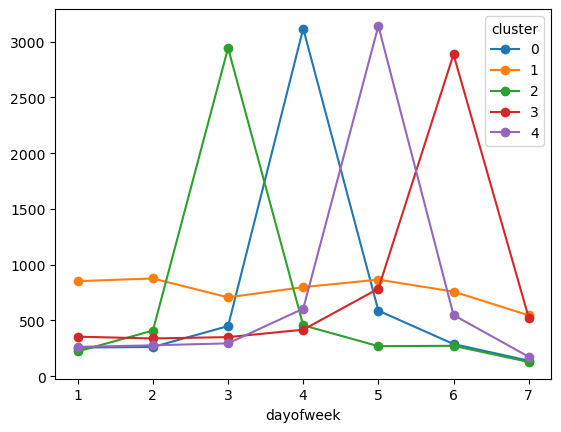

In [67]:
kmeans = KMeans(n_clusters=5,random_state=42)
x_cols = [i for i in customer_df.columns if '_ratio' in str(i)]

kmeans.fit(customer_df.loc[:,x_cols])
customer_df['cluster'] = kmeans.predict(customer_df.loc[:,x_cols])
customer_df.groupby('cluster')[X.columns].mean().T.plot(marker = 'o')

In [68]:
df.head()

,customer_id,visit_date,visit_spend,daynum,dayofweek
0,2,2010-04-01,5.97,0,4
1,2,2010-04-06,12.71,5,2
2,2,2010-04-07,34.52,6,3
3,2,2010-04-12,7.89,11,1
4,2,2010-04-14,17.17,13,3


In [69]:
df['year_month'] = df['visit_date'].apply(lambda x: str(x)[:7])

In [70]:
df.head()

,customer_id,visit_date,visit_spend,daynum,dayofweek,year_month
0,2,2010-04-01,5.97,0,4,2010-04
1,2,2010-04-06,12.71,5,2,2010-04
2,2,2010-04-07,34.52,6,3,2010-04
3,2,2010-04-12,7.89,11,1,2010-04
4,2,2010-04-14,17.17,13,3,2010-04


In [71]:
customer_df = df.groupby(['customer_id','year_month'])['visit_spend'].count().unstack()

In [73]:
customer_df.head()

year_month,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06
customer_id,,,,,,,,,,,,,,,
2,9.0,10.0,4.0,7.0,7.0,12.0,8.0,8.0,11.0,10.0,8.0,8.0,12.0,6.0,5.0
3,13.0,15.0,10.0,9.0,9.0,10.0,13.0,11.0,10.0,10.0,13.0,9.0,15.0,13.0,7.0
4,8.0,7.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,6.0,6.0,5.0,6.0,8.0,5.0
5,10.0,4.0,8.0,14.0,11.0,7.0,10.0,9.0,2.0,8.0,10.0,14.0,11.0,9.0,6.0
6,4.0,4.0,5.0,4.0,6.0,5.0,4.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,2.0


In [76]:
customer_df.isna().sum()

year_month
2010-04    0
2010-05    0
2010-06    0
2010-07    0
2010-08    0
2010-09    0
2010-10    0
2010-11    0
2010-12    0
2011-01    0
2011-02    0
2011-03    0
2011-04    0
2011-05    0
2011-06    0
dtype: int64

In [75]:
customer_df.fillna(0, inplace=True)

D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '2011-05'),
  Text(0.0, 0, '2010-04'),
  Text(2.0, 0, '2010-06'),
  Text(4.0, 0, '2010-08'),
  Text(6.0, 0, '2010-10'),
  Text(8.0, 0, '2010-12'),
  Text(10.0, 0, '2011-02'),
  Text(12.0, 0, '2011-04'),
  Text(14.0, 0, '2011-06'),
  Text(16.0, 0, '')])

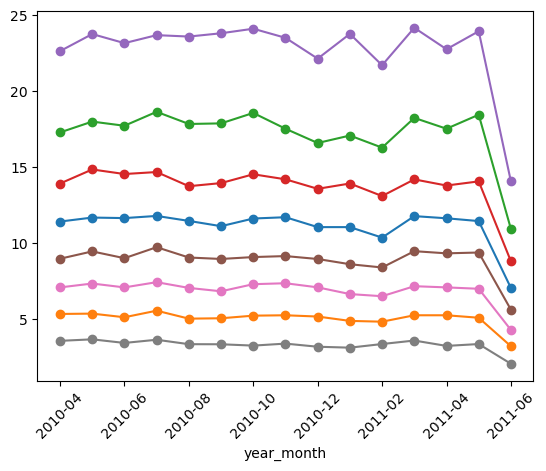

In [77]:
X_cols = customer_df.columns.tolist()
X = customer_df.loc[:,X_cols]

kmeans = KMeans(n_clusters=8,random_state=42)
kmeans.fit(X)
customer_df['cluster'] = kmeans.predict(X)

customer_df.groupby('cluster')[X_cols].mean().T.plot(marker='o', legend = None)
plt.xticks(rotation = 45)

D:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '2011-05'),
  Text(0.0, 0, '2010-04'),
  Text(2.0, 0, '2010-06'),
  Text(4.0, 0, '2010-08'),
  Text(6.0, 0, '2010-10'),
  Text(8.0, 0, '2010-12'),
  Text(10.0, 0, '2011-02'),
  Text(12.0, 0, '2011-04'),
  Text(14.0, 0, '2011-06'),
  Text(16.0, 0, '')])

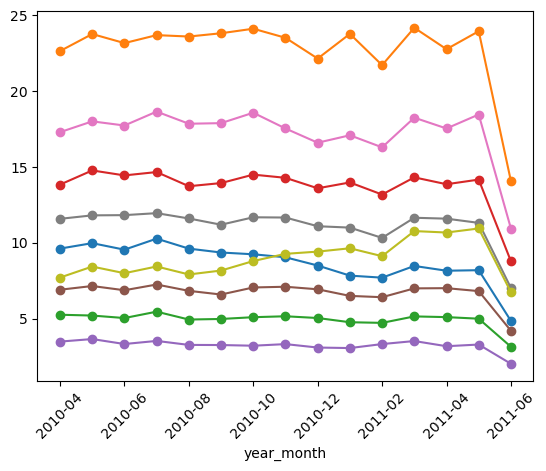

In [78]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(customer_df[X_cols])

customer_df['cluster_month'] = kmeans.predict(customer_df[X_cols])

customer_df.groupby('cluster_month')[X_cols].mean().T.plot(marker='o', legend = None)
plt.xticks(rotation = 45)